In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
step = np.pi / 1024
rectangle = np.array(((2.0, 0.0), (2.0, 1.0), (0.0, 1.0), (0.0, 0.0)))

In [238]:
angles = np.arange(0.0, 2 * np.pi, step)
lengths = []
for theta in angles:
    c, s = np.cos(theta), np.sin(theta)
    rot = np.array(((c,-s), (s, c)))
    rotation_matrix = np.array([rot, rot, rot, rot])
    result = np.einsum('ik,ijk->ij', rectangle, rotation_matrix)
    maxs = np.amax(result, axis=0)
    mins = np.amin(result, axis=0)
    
    distances = maxs - mins
#     print(np.rad2deg(theta))
#     print(result)
#     print(maxs)
#     print(mins)
#     print(distances)
#     print(distances[0] * distances[1])
    lengths.append(distances)

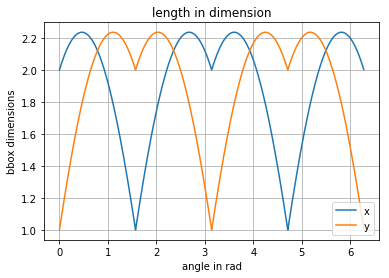

In [239]:
fig, ax = plt.subplots()
ax.plot(angles, lengths)
ax.legend(['x', 'y'])
ax.set(xlabel='angle in rad', ylabel='bbox dimensions',
       title='length in dimension')
ax.grid()
plt.show()

In [240]:
ratios = [l[0] / l[1] for l in lengths]

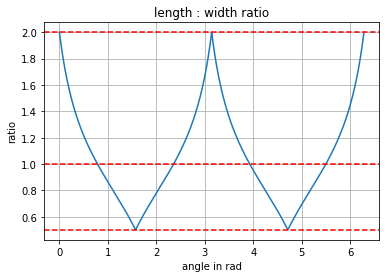

In [254]:
fig, ax = plt.subplots()
ax.plot(angles, ratios)

ax.set(xlabel='angle in rad', ylabel='ratio',
       title='length : width ratio')
ax.axhline(1.0, label='1:1', linestyle='--', color='r')
ax.axhline(2.0, label='2:1', linestyle='--', color='r')
ax.axhline(0.5, label='1:2', linestyle='--', color='r')
ax.grid()
plt.show()

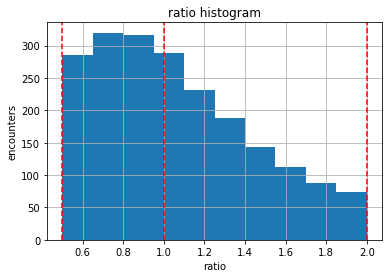

In [259]:
fig, ax = plt.subplots()
ax.hist(ratios)

ax.set(xlabel='ratio', ylabel='encounters',
       title='ratio histogram')
ax.axvline(1.0, label='1:1', linestyle='--', color='r')
ax.axvline(2.0, label='2:1', linestyle='--', color='r')
ax.axvline(0.5, label='1:2', linestyle='--', color='r')
ax.grid()
plt.show()